Demo of pipeline 
================

In [ ]:
%%! 

ROOT_DIR="D:\mzb-workflow"
MODEL_C="convnext-small-v0" # classification model
MODEL_S="mit-b2-v0" # skeletonization model

## SEGMENTATION ##
python ${ROOT_DIR}/scripts/image_parsing/main_raw_to_clips.py \
    --input_dir=${ROOT_DIR}/data/mzb_example_data/raw_img/ \
    --output_dir=${ROOT_DIR}/data/mzb_example_data/derived/blobs/ \
    --save_full_mask_dir=${ROOT_DIR}/data/mzb_example_data/derived/full_image_masks \
    --config_file=${ROOT_DIR}/configs/mzb_example_config.yaml \
    -v

The first module is **segmentation**: it extracts clips of single organisms from images with lots of organisms. 

![Segmentation](../../../assets/mzbsuite_segmentation.gif "Segmentation")

In [ ]:
%%! 

## CLASSIFICATION ##
python ${ROOT_DIR}/scripts/classification/main_classification_inference.py \
    --input_dir=${ROOT_DIR}/data/mzb_example_data/training_dataset/trn_set/ \
    --input_model=${ROOT_DIR}/models/mzb-classification-models/${MODEL_C} \
    --taxonomy_file=${ROOT_DIR}/data/mzb_example_data/MZB_taxonomy.csv \
    --output_dir=${ROOT_DIR}/results/mzb_example/classification/trn_set/ \
    --config_file=${ROOT_DIR}/configs/mzb_example_config.yaml \
    -v

Once we have single organisms' clips we use the **classification** module to assign a taxonomic category to each clip. It will return a table with each class's prediction probability for each clip. 

| file                                      | pred          | acari    | coleoptera | diptera  | ephemeroptera | errors   | oligochaeta | plecoptera | trichoptera |
| ----------------------------------------- | ------------- | -------- | ---------- | -------- | ------------- | -------- | ----------- | ---------- | ----------- |
| 31_b1_baetis_01_clip_1_rgb.jpg            | ephemeroptera | 1.49E-03 | 2.62E-04   | 3.19E-03 | 8.47E-01      | 3.02E-04 | 1.25E-04    | 1.44E-01   | 2.84E-03    |
| 31_b1_diptera_pupae_01_clip_1_rgb.jpg     | diptera       | 5.37E-07 | 1.89E-06   | 9.99E-01 | 2.83E-06      | 6.40E-07 | 1.43E-06    | 5.21E-04   | 3.97E-06    |
| 31_b1_ephemeroptera_01_clip_9_rgb.jpg     | ephemeroptera | 1.41E-04 | 3.47E-04   | 1.17E-03 | 9.55E-01      | 2.81E-04 | 7.69E-05    | 4.26E-02   | 4.65E-04    |
| 31_b1_isoperla_01_clip_2_rgb.jpg          | plecoptera    | 5.41E-05 | 3.73E-05   | 5.87E-05 | 3.55E-02      | 9.08E-05 | 1.36E-05    | 9.64E-01   | 1.76E-04    |
| 31_b2_hydropsychidae_01_clip_1_rgb.jpg    | trichoptera   | 3.30E-03 | 5.92E-04   | 1.96E-02 | 1.56E-02      | 3.12E-04 | 9.78E-05    | 3.91E-02   | 9.21E-01    |
| 31_b2_plecoptera_01_clip_3_rgb.jpg        | plecoptera    | 6.39E-05 | 1.64E-06   | 1.98E-03 | 1.52E-02      | 1.85E-05 | 4.65E-05    | 9.82E-01   | 5.14E-04    |
| 31_bd_chironomidae_01_clip_5_rgb.jpg      | diptera       | 7.04E-07 | 4.01E-07   | 1.00E+00 | 1.19E-04      | 7.87E-07 | 2.43E-05    | 1.73E-04   | 6.49E-06    |
| 31_bd_simuliidae_01_clip_10_rgb.jpg       | diptera       | 5.31E-05 | 3.35E-05   | 9.99E-01 | 6.63E-05      | 7.87E-05 | 1.97E-04    | 1.02E-04   | 6.05E-04    |
| 31_hf2_acari_01_clip_1_rgb.jpg            | acari         | 8.02E-01 | 9.16E-03   | 1.84E-02 | 3.27E-02      | 6.06E-03 | 1.95E-03    | 6.07E-02   | 6.88E-02    |
| 31_hf2_baetidae_01_clip_2_rgb.jpg         | ephemeroptera | 2.08E-05 | 1.60E-06   | 1.94E-04 | 1.00E+00      | 8.39E-06 | 1.17E-06    | 2.01E-04   | 2.00E-05    |
| 32_hf1_coleoptera_adult_01_clip_1_rgb.jpg | coleoptera    | 9.10E-03 | 9.53E-01   | 1.13E-02 | 8.65E-03      | 3.71E-03 | 2.78E-04    | 9.37E-03   | 4.51E-03    |
| 32_hf1_diptera_pupae_01_clip_3_rgb.jpg    | diptera       | 2.44E-04 | 2.49E-04   | 9.77E-01 | 1.33E-02      | 4.58E-04 | 3.94E-04    | 7.87E-03   | 2.68E-04    |
| 32_ob_baetidae_01_clip_1_rgb.jpg          | ephemeroptera | 8.35E-05 | 7.99E-05   | 8.81E-04 | 9.85E-01      | 1.74E-04 | 7.02E-05    | 1.37E-02   | 2.71E-04    |
| 32_ob_plecoptera_01_clip_2_rgb.jpg        | plecoptera    | 1.27E-04 | 3.35E-04   | 1.40E-04 | 3.18E-02      | 2.17E-04 | 8.59E-05    | 9.67E-01   | 1.94E-04    |

In [ ]:
%%! 

## UNSUPERVISED SKELETONIZATION ## 
python ${ROOT_DIR}/scripts/skeletons/main_unsupervised_skeleton_estimation.py \
    --input_dir=${ROOT_DIR}/data/mzb_example_data/derived/blobs/ \
    --output_dir=${ROOT_DIR}/results/mzb_example/skeletons/unsupervised_skeletons/ \
    --save_masks=${ROOT_DIR}/data/mzb_example_data/derived/skeletons/unsupervised_skeletons/ \
    --config_file=${ROOT_DIR}/configs/mzb_example_config.yaml \
    --list_of_files=None \
    -v

From organisms' clips, we can also derive body length with the **unsupervised skeletonization** module...

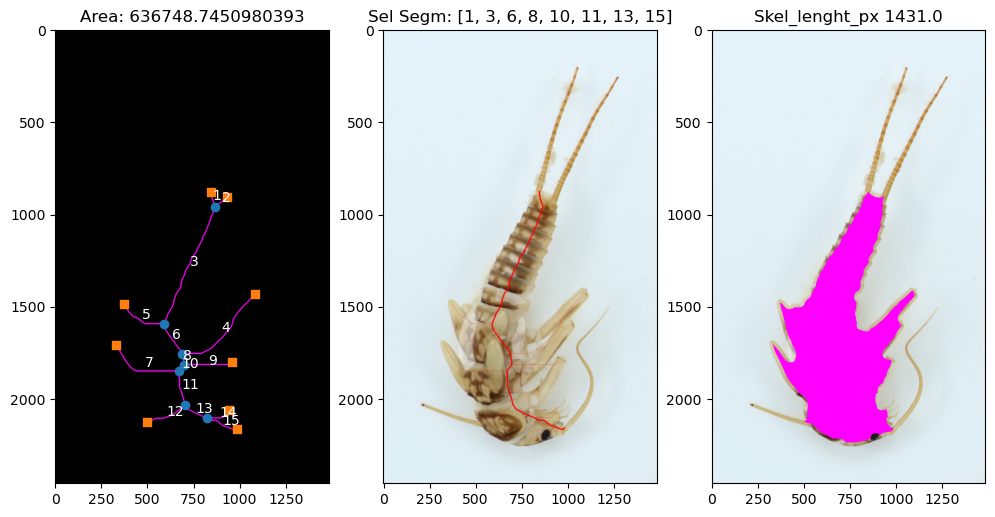

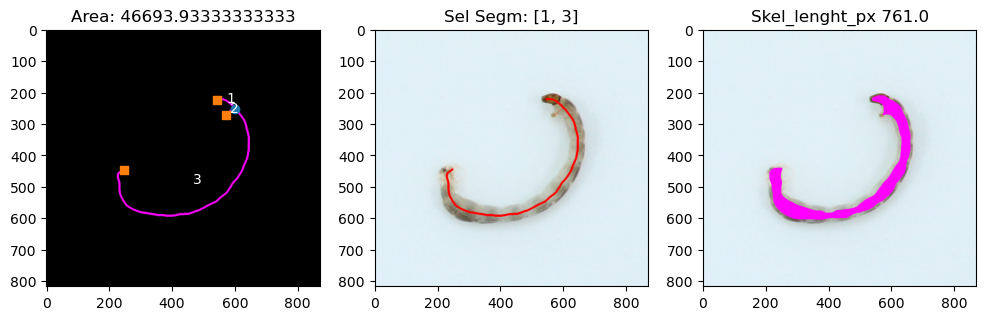

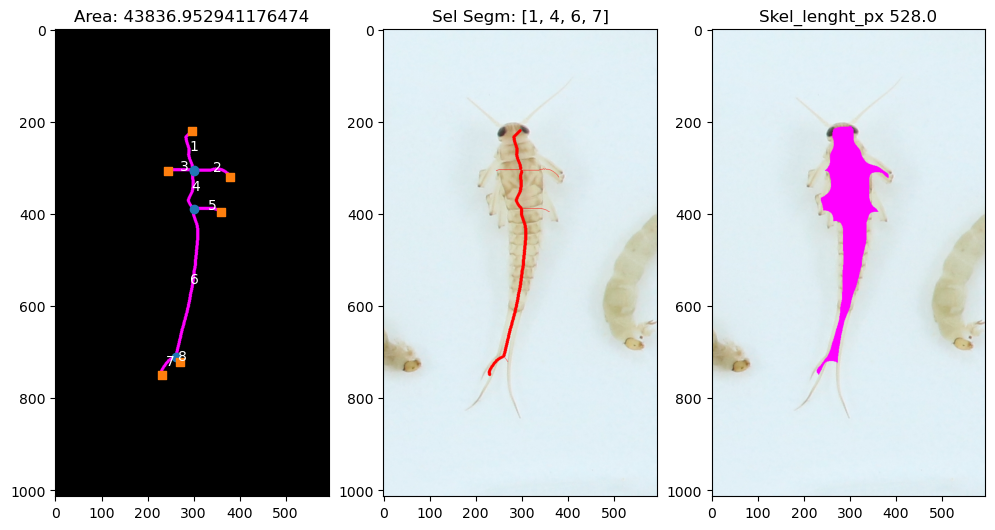

In [ ]:
%%! 

## SUPERVISED SKELETONIZATION ## 
python ${ROOT_DIR}/scripts/skeletons/main_supervised_skeleton_inference.py \
    --input_dir=${ROOT_DIR}/data/mzb_example_data/derived/blobs/ \
    --input_type="external" \
    --input_model=${ROOT_DIR}/models/mzb-skeleton-models/${MODEL_S} \
    --output_dir=${ROOT_DIR}/results/mzb_example/skeletons/supervised_skeletons/ \
    --save_masks=${ROOT_DIR}/data/mzb_example_data/derived/skeletons/supervised_skeletons/ \
    --config_file=${ROOT_DIR}/configs/mzb_example_config.yaml \ 
    -v

...or both body length and head width with the **supervised skeletonization** module. 

*...coming soon...*